<a href="https://colab.research.google.com/github/lurndatascience/DeepLearning/blob/main/ANN_For_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
# import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

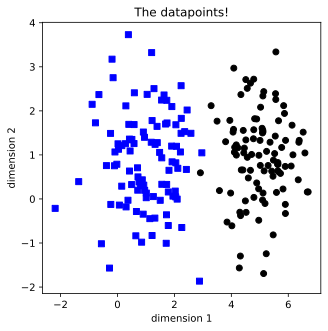

In [106]:
per_cluster = 100
blur = 1

A = [ 1 , 1 ]
B = [ 5 , 1 ]

# Generate Data
a = [ A[0] + np.random.randn(per_cluster) * blur ,  A[1] + np.random.randn(per_cluster) * blur  ]
b = [ B[0] + np.random.randn(per_cluster) * blur ,  B[1] + np.random.randn(per_cluster) * blur  ]


# True Labels
labels_np = np.vstack ( (  np.zeros( (per_cluster, 1) ),  np.ones( (per_cluster, 1) )  ) )

data_np = np.hstack(( a, b) ).T

labels = torch.tensor(labels_np).float()
data = torch.tensor(data_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The datapoints!')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.show()

In [107]:
ANN_classify = nn.Sequential(
    nn.Linear(2,1),     # INPUT LAYER | 2 Input features | data is 2 D
    nn.ReLU(),          # ACTIVATION FUNCTION INSIDE
    nn.Linear(1,1),     # takes an input from input layer and process in one 
    nn.Sigmoid()        # Sigmoid for Last Activation FUNCTION
)

In [108]:
ANN_classify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [109]:
# OTHER MODEL FEATURES

# LR
learning_rate = 0.05

# Note: You'll learn in the "Metaparameters" section that it's better to use BCEWithLogitsLoss, but this is OK for now.
# Loss Function
bceloss = nn.BCELoss()

# Optimizer SGD
optimizer = torch.optim.SGD(ANN_classify.parameters(),lr = learning_rate)

In [110]:
# Lets train the model
number_of_epochs = 1000
epochs = range(number_of_epochs)

losses = torch.zeros(number_of_epochs)

for epoch in epochs:

  # Forward
  y_hat = ANN_classify(data)

  # Compute loss
  loss = bceloss(y_hat,labels)
  losses[epoch] =loss

  # Backword
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

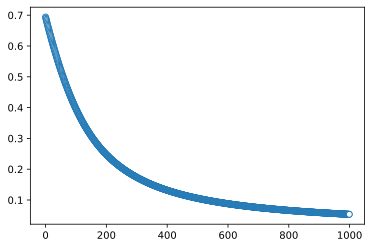

In [111]:
from matplotlib import markers
plt.plot(losses.detach(),'o', markerfacecolor='w',linewidth=.1)

In [112]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = ANN_classify(data)

predlabels = predictions>.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100-100*len(misclassified)/(2*per_cluster)

print('Final accuracy: %g%%' %totalacc)

Final accuracy: 98.5%


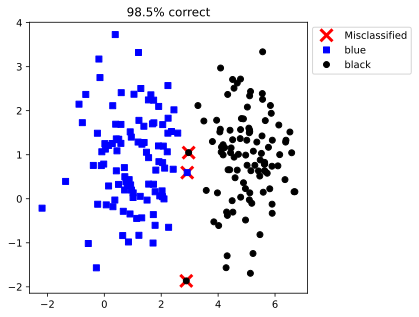

In [113]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()

In [119]:
intercept = ANN_classify[2].bias.item()

In [120]:
weight = ANN_classify[2].weight.item()

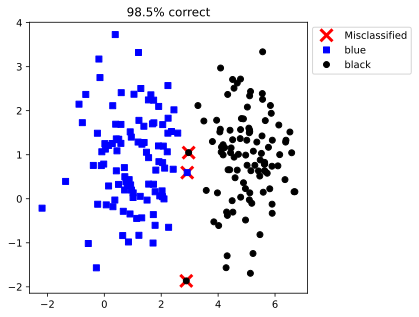

In [129]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')
# plt.plot(data, y)
# plt.plot( weight* data + intercept )

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()